In [1]:
#@author: Niraj Kumar

In [2]:
#necessary imports
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import random

Sample Image


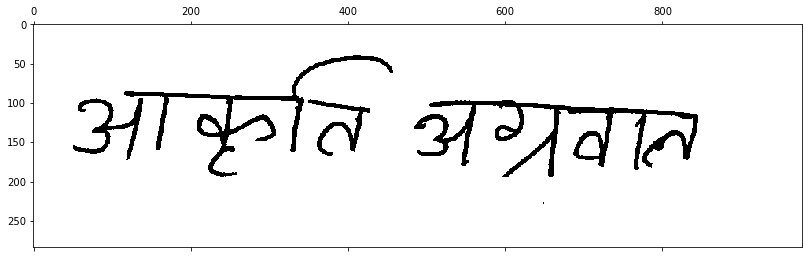

In [3]:
#loading the Signature dataset
path = "./Hindi/"
dir_list = next(os.walk(path))[1]
dir_list.sort()

#for training and testing data
trainer, tester  = [], []

#for storing the labels
train_labels = np.array([])
test_labels = np.array([])

#creating a mix of forged and genuine signatures to create a training and testing dataset
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    
    images_forged = images[:30]
    images_original = images[30:]
    
    #shufflilng the signatures 
    random.shuffle(images_forged)
    random.shuffle(images_original)
    
    trainer.append(images_forged[:22])
    train_labels = np.append(train_labels, np.zeros(22, dtype = float))
    
    trainer.append(images_original[:18])
    train_labels = np.append(train_labels, np.ones(18, dtype = float))
    
    tester.append(images_forged[22:])
    test_labels = np.append(test_labels, np.zeros(8, dtype = float))
    
    tester.append(images_original[18:])
    test_labels = np.append(test_labels, np.ones(6, dtype = float))

print("Sample Image")
im = imageio.imread(trainer[0][0])
plt.matshow(im, cmap = 'gray')

In [4]:
import cv2

#Resizing and storing the images directly in test and train array
temp_train_set, temp_test_set = [], []

for person in trainer:
    for sign in person:
        im = cv2.imread(sign)
        res = cv2.resize(im, dsize=(225, 75), interpolation=cv2.INTER_CUBIC)
        temp_train_set.append(res)

for person in tester:
    for sign in person:
        im = cv2.imread(sign)
        res = cv2.resize(im, dsize=(225, 75), interpolation=cv2.INTER_CUBIC)
        temp_test_set.append(res)

train_set = np.array(temp_train_set)
test_set = np.array(temp_test_set)

#Normalising the train and test dataset
train_set = train_set / 255
test_set = test_set / 255

Modified Image


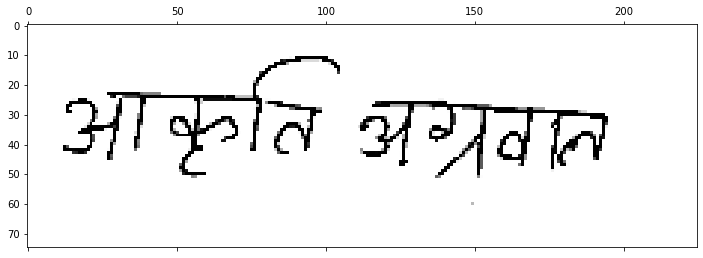

In [5]:
#sample Image after resizing
print("Modified Image")
plt.matshow(train_set[0], cmap = 'gray')

In [6]:
#defining a model for pure MLP
def get_model_MLP():
    model = keras.Sequential([
                            keras.layers.Flatten(), 
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(2, activation = 'softmax')
      ])
    
    model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

In [7]:
#defining a model for MLP along with CNN layers
def get_model_CNN():
    model = keras.Sequential([
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(75, 225, 3)),
                            tf.keras.layers.MaxPooling2D(2, 2),
                            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                            tf.keras.layers.MaxPooling2D(2,2),
                            keras.layers.Flatten(), 
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(64, activation='relu'),
                            keras.layers.Dense(2, activation = 'softmax')
      ])
    
    model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    return model

In [8]:
model_MLP = get_model_MLP()
model_MLP.fit(train_set, train_labels, epochs = 5)
model_MLP.summary()
model_MLP.evaluate(test_set, test_labels)   



Epoch 1/5
200/200 [==============================] - 7s 8ms/step - loss: 0.7240 - accuracy: 0.5419
Epoch 2/5
200/200 [==============================] - 1s 6ms/step - loss: 0.6886 - accuracy: 0.5500
Epoch 3/5
200/200 [==============================] - 1s 6ms/step - loss: 0.6882 - accuracy: 0.5500: 0s - loss: 0.6
Epoch 4/5
200/200 [==============================] - 1s 6ms/step - loss: 0.6882 - accuracy: 0.5500
Epoch 5/5
200/200 [==============================] - 1s 6ms/step - loss: 0.6882 - accuracy: 0.5500
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 50625)               0         
_________________________________________________________________
dense (Dense)                (32, 64)                  3240064   
_________________________________________________________________
dense_1 (Dense)              (32, 64)                  4160      
_______

[0.6838445663452148, 0.5714285969734192]

In [9]:
model_CNN = get_model_CNN()
model_CNN.summary()
model_CNN.fit(train_set, train_labels, epochs = 5)
model_CNN.evaluate(test_set, test_labels)   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 223, 64)       1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 111, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 109, 64)       36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 54, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 58752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                3760192   
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

[0.5358499884605408, 0.7388392686843872]